In [9]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
import glob
from PIL import Image
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D
!mkdir /root/.kaggle
!cp /content/kaggle.json /root/.kaggle
!kaggle competitions download -c facial-keypoints-detection
!unzip /content/test.zip
!unzip /content/training.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 30.5MB/s]
 77% 46.0M/60.1M [00:00<00:00, 73.7MB/s]
100% 60.1M/60.1M [00:00<00:00, 122MB/s] 
  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 116MB/s]
 88% 14.0M/16.0M [00:00<00:00, 54.9MB/s]
100% 16.0M/16.0M [00:00<00:00, 62.9MB/s]
Archive:  /content/test.zip
  inflating: test.csv                
Archive:  /content/training.zip
  inflating: training.csv            


In [10]:
train = pd.read_csv('/content/training.csv')
test = pd.read_csv('/content/test.csv')

In [11]:
db = train.copy()
Image = [np.array(img.split(' '),dtype = np.float32) for img in db.Image]
db.drop('Image', axis = 1, inplace = True)

In [56]:
X = []
for image in Image:
    # img = np.reshape(image, (96,96,1))
    # img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    img = img / 255
    X.append(img)
X = np.array(X)

In [47]:
db.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [48]:
# plt.imshow(Y[0])
# plt.plot(db.loc[1], linestyles='0')
keypoint_features = []
for idx, features in db.iterrows():
    keypoint_features.append(features)
keypoint_features = np.array(keypoint_features, dtype=float)
keypoint_features[0]

array([-0.48208969, -0.69409981, -0.76292543, -0.71433978, -0.53268961,
       -0.68903982, -0.42642866, -0.68650983, -0.71485042, -0.70674979,
       -0.8160559 , -0.70674979, -0.55330774, -0.77228511, -0.37076762,
       -0.74723029, -0.68448934, -0.77253081, -0.87171467, -0.76747082,
       -0.65160336, -0.55241723, -0.5200368 , -0.37278302, -0.77557258,
       -0.39302751, -0.66029332, -0.42795719, -0.66171995, -0.33736648])

In [49]:
def plot_sample(image, keypoint):
    plt.imshow(image, cmap='gray')
    plt.scatter(keypoint[0::2], keypoint[1::2], marker='x', s=20)

In [50]:
# Take care of the null values
db.fillna(method = 'ffill',inplace = True)

In [51]:
Y = db.copy()
Y = np.array(Y)

TypeError: ignored

In [57]:

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(128, activation="relu"),
                         Dropout(0.1),
                         Dense(64, activation="relu"),
                         Dense(30)
                         ])
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

# model = Sequential([
#                     base_model,
#                     Flatten(),
#                     # Dense(512, activation = 'relu'),
#                     Dense(256, activation = 'relu'),
#                     Dense(128, activation = 'relu'),
#                     Dense(30,activation=  'relu' )
            
# ])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)       

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)       

In [59]:
model.compile(optimizer = tf.keras.optimizers.Adam(3e-4), metrics = ['mse'], loss = tf.keras.losses.MeanSquaredError())

In [60]:
model.fit(X, Y, epochs = 100, batch_size = 128, validation_split = 0.2)

Epoch 1/100
45/45 [==============================] - 18s 288ms/step - loss: 0.2832 - mse: 0.2832 - val_loss: 0.2472 - val_mse: 0.2472
Epoch 2/100
45/45 [==============================] - 12s 258ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.1544 - val_mse: 0.1544
Epoch 3/100
45/45 [==============================] - 12s 259ms/step - loss: 0.0224 - mse: 0.0224 - val_loss: 0.0952 - val_mse: 0.0952
Epoch 4/100
45/45 [==============================] - 12s 259ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0625 - val_mse: 0.0625
Epoch 5/100
45/45 [==============================] - 12s 259ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 6/100
45/45 [==============================] - 12s 259ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 7/100
45/45 [==============================] - 12s 259ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 8/100
45/45 [==============================] - 12s 259ms

In [61]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [62]:
test_image = [np.array(img.split(' '),dtype = np.float32) for img in test.Image]

In [63]:
X_test = []
for image in test_image:
    img = np.reshape(image, (96,96,1))
    img = img / 255
    X_test.append(img)
X_test = np.array(X_test)

In [64]:
pred = model.predict(X_test)

In [86]:
pred = np.array(pred)
pred[2]

array([-0.48267123, -0.71242136, -0.7573561 , -0.70948786, -0.5323221 ,
       -0.7113906 , -0.4243701 , -0.71998864, -0.71280503, -0.7034032 ,
       -0.8248869 , -0.70013225, -0.5637645 , -0.7759216 , -0.37380385,
       -0.7772645 , -0.6988725 , -0.7631962 , -0.87718123, -0.7505147 ,
       -0.6162307 , -0.5391548 , -0.47750783, -0.42189607, -0.7386    ,
       -0.4052077 , -0.6067956 , -0.4349518 , -0.6175265 , -0.38179696],
      dtype=float32)

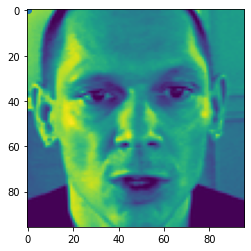

In [65]:
pred[0]

array([-0.48303685, -0.7162976 , -0.7706508 , -0.7198898 , -0.53532887,
       -0.7116786 , -0.4280777 , -0.7137811 , -0.7196319 , -0.71205825,
       -0.8306017 , -0.7100148 , -0.56122315, -0.7820016 , -0.37699404,
       -0.7754333 , -0.7023183 , -0.77831763, -0.88171655, -0.76850593,
       -0.62508756, -0.5613006 , -0.50355875, -0.412543  , -0.7479209 ,
       -0.40925986, -0.6238551 , -0.44827777, -0.6279236 , -0.36210793],
      dtype=float32)

In [ ]:
lookid_data = pd.read_csv('../input/facial-keypoints-detection/IdLookupTable.csv')
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

rowid = lookid_data['RowId']
rowid=list(rowid)
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('face_key_detection_submission.csv',index = False)